In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


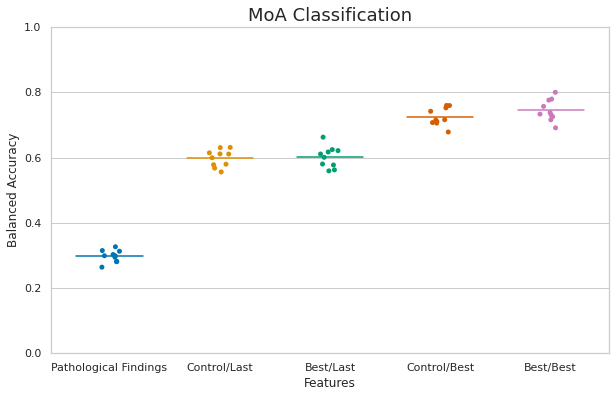

In [12]:
import pandas as pd
macro_df = pd.read_csv(f"../../outputs/results/230704compound_validation_macro_123.csv")
df = macro_df.groupby(["model", "layer", "trial"]).mean()
df["model layer trial"] = df.index.to_numpy()
data = []
for (m, l, _), a in df[["model layer trial", "Macro Balanced Accuracy"]].to_numpy():
    if m=="Control" and l=="Head":
        data.append(["Control/Last", a])
    if m=="Block 5" and l=="Head":
        data.append(["Best/Last", a])
    if m=="Control" and l=="Block 6":
        data.append(["Control/Best", a])
    if m=="Block 5" and l=="Block 6":
        data.append(["Best/Best", a])
    if m=="Pathological Findings":
        data.append(["Pathological Findings", a])

score_df = pd.DataFrame(data, columns=["Features", "Balanced Accuracy"])
fs =  ["Pathological Findings", "Control/Last", "Best/Last", "Control/Best", "Best/Best"]

plt.rcParams["font.size"] = 14
plt.figure(figsize=(10,6))

plt.title("MoA Classification", fontsize=18)
sns.set(style = 'whitegrid') 
plt.ylim(0,1)
palette = sns.color_palette("colorblind")
sns.stripplot(x="Features", y="Balanced Accuracy", order=fs,
     data=score_df, legend=False, palette="colorblind")
for i, c in enumerate(fs):
    m = score_df[score_df["Features"]==c].mean()
    plt.plot([i-0.3, i+0.3], [m, m], color = palette[i])
plt.savefig("../../outputs/230719MoA_Classification_strip.png", bbox_inches="tight", dpi=300)

# sns.stripplot(data=df, x="features", y="Balanced Accuracy",
#     order = fs, palette = "colorblind")
# plt.ylim(0,1)
# for i, f in enumerate(fs):
#     y = df[df["features"] == f]["Balanced Accuracy"].mean()
#     plt.plot([i-0.3, i+0.3], [y, y])


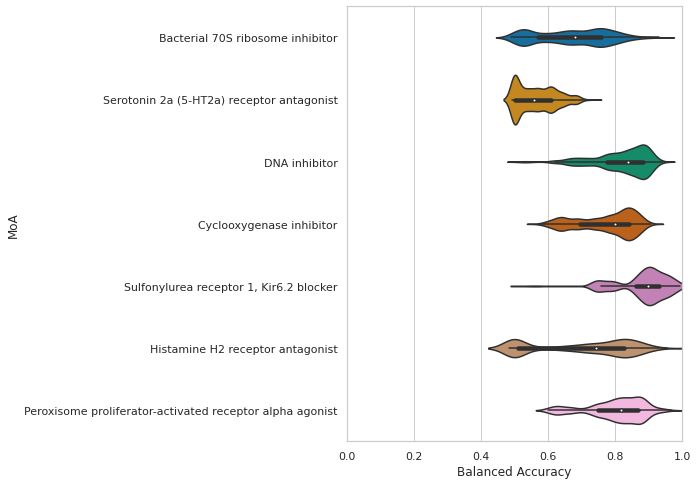

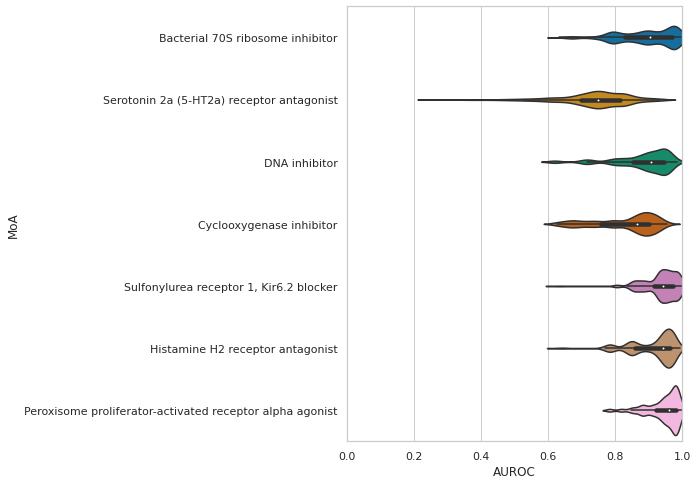

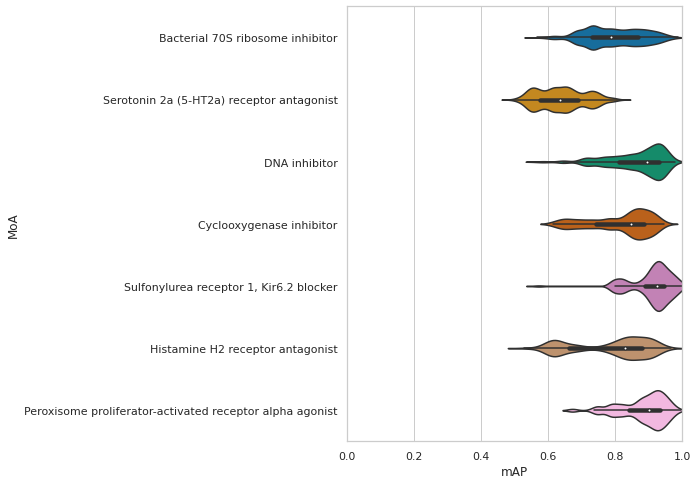

In [29]:
dfs = [pd.read_csv(f"../../outputs/results/230704compound_validation_{seed+123}.csv") for seed in range(5)]

moas = ['Bacterial 70S ribosome inhibitor_Balanced Accuracy',
       'Serotonin 2a (5-HT2a) receptor antagonist_Balanced Accuracy',
       'DNA inhibitor_Balanced Accuracy',
       'Cyclooxygenase inhibitor_Balanced Accuracy',
       'Sulfonylurea receptor 1, Kir6.2 blocker_Balanced Accuracy',
       'Histamine H2 receptor antagonist_Balanced Accuracy',
       'Peroxisome proliferator-activated receptor alpha agonist_Balanced Accuracy',]
moa_list = [m.split("_")[0] for m in moas]
for mtrx in ["Balanced Accuracy", "AUROC", "mAP"]:
    data = []
    for seed in range(5):
        raw_df = pd.read_csv(f"../../outputs/results/230704compound_validation_{123+seed}.csv")
        for m in moa_list:
            d = raw_df.groupby(["model", "layer", "fold"]).mean()[m + "_" + mtrx]
            d["index"] = d.index
            for (model, layer), b in d[["index", m + "_" + mtrx]].to_numpy():
                if model_name.index(model) + layer_name.index(layer) >= 8:
                    data.append([m, b])
    df = pd.DataFrame(data, columns = ["MoA", mtrx]) 
    plt.figure(figsize=(6,8))
    plt.xlim(0, 1)
    plt.rcParams["font.size"] = 16
    sns.violinplot(data=df, x=mtrx, y="MoA", palette = "colorblind")


In [30]:
df1 = raw_df.groupby(["model", "layer", "fold"]).mean()[m + "_" + mtrx]
df1

model                  layer    fold
Block 1                Block 1  0       0.824418
                                1       0.847565
                                2       0.814350
                                3       0.859054
                                4       0.773144
                                          ...   
Pathological Findings  -        0       0.862859
                                1       0.828125
                                2       0.807542
                                3       0.853483
                                4       0.843795
Name: Peroxisome proliferator-activated receptor alpha agonist_mAP, Length: 455, dtype: float64

MultiIndex([(              'Block 1', 'Block 1', 0),
            (              'Block 1', 'Block 1', 1),
            (              'Block 1', 'Block 1', 2),
            (              'Block 1', 'Block 1', 3),
            (              'Block 1', 'Block 1', 4),
            (              'Block 1', 'Block 2', 0),
            (              'Block 1', 'Block 2', 1),
            (              'Block 1', 'Block 2', 2),
            (              'Block 1', 'Block 2', 3),
            (              'Block 1', 'Block 2', 4),
            ...
            (                 'Head',    'Stem', 0),
            (                 'Head',    'Stem', 1),
            (                 'Head',    'Stem', 2),
            (                 'Head',    'Stem', 3),
            (                 'Head',    'Stem', 4),
            ('Pathological Findings',       '-', 0),
            ('Pathological Findings',       '-', 1),
            ('Pathological Findings',       '-', 2),
            ('Pathological Fin

In [13]:
import pandas as pd
df = pd.read_csv(f"../../outputs/230311prognosis_result_123.csv")
df

,model,layer,finding type,AUROC,AP
0,Control,Stem,"Alteration, cytoplasmic",0.793701,0.588567
1,Control,Stem,"Alteration, nuclear",0.864156,0.607443
2,Control,Stem,Altered hepatocellular foci,0.814909,0.561044
3,Control,Stem,Anisonucleosis,0.866892,0.673407
4,Control,Stem,Atrophy,0.922763,0.619658
...,...,...,...,...,...
2726,Pathological Findings,-,"Proliferation, bile duct",0.583333,0.582933
2727,Pathological Findings,-,"Proliferation, oval cell",0.500000,0.500000
2728,Pathological Findings,-,Single cell necrosis,0.579815,0.549722
2729,Pathological Findings,-,Swelling,0.500000,0.500000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


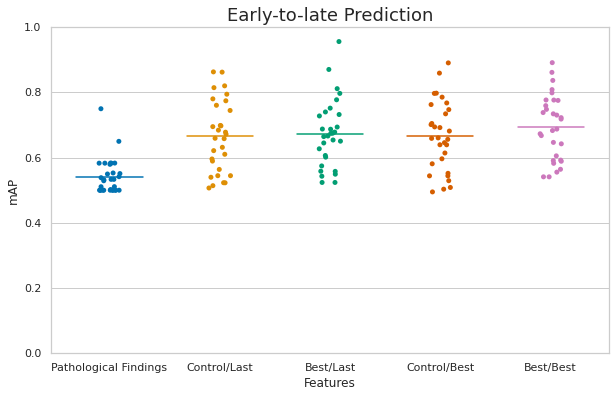

In [14]:
df = df.groupby(["model", "layer", "finding type"]).mean()
df["model layer ft"] = df.index.to_numpy()
data = []
for (m, l, _), a in df[["model layer ft", "AP"]].to_numpy():
    if m=="Control" and l=="Head":
        data.append(["Control/Last", a])
    if m=="Full" and l=="Head":
        data.append(["Best/Last", a])
    if m=="Control" and l=="Block 7":
        data.append(["Control/Best", a])
    if m=="Full" and l=="Block 7":
        data.append(["Best/Best", a])
    if m=="Pathological Findings":
        data.append(["Pathological Findings", a])

score_df = pd.DataFrame(data, columns=["Features", "mAP"])
fs =  ["Pathological Findings", "Control/Last", "Best/Last", "Control/Best", "Best/Best"]
plt.rcParams["font.size"] = 14
plt.figure(figsize=(10,6))

plt.title("Early-to-late Prediction", fontsize=18)
sns.set(style = 'whitegrid') 
plt.ylim(0,1)
palette = sns.color_palette("colorblind")
sns.stripplot(x="Features", y="mAP", order=fs,
     data=score_df, legend=False, palette="colorblind")
for i, c in enumerate(fs):
    m = score_df[score_df["Features"]==c].mean()
    plt.plot([i-0.3, i+0.3], [m, m], color = palette[i])
plt.savefig("../../outputs/230719ELP_strip.png", bbox_inches="tight", dpi=300)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


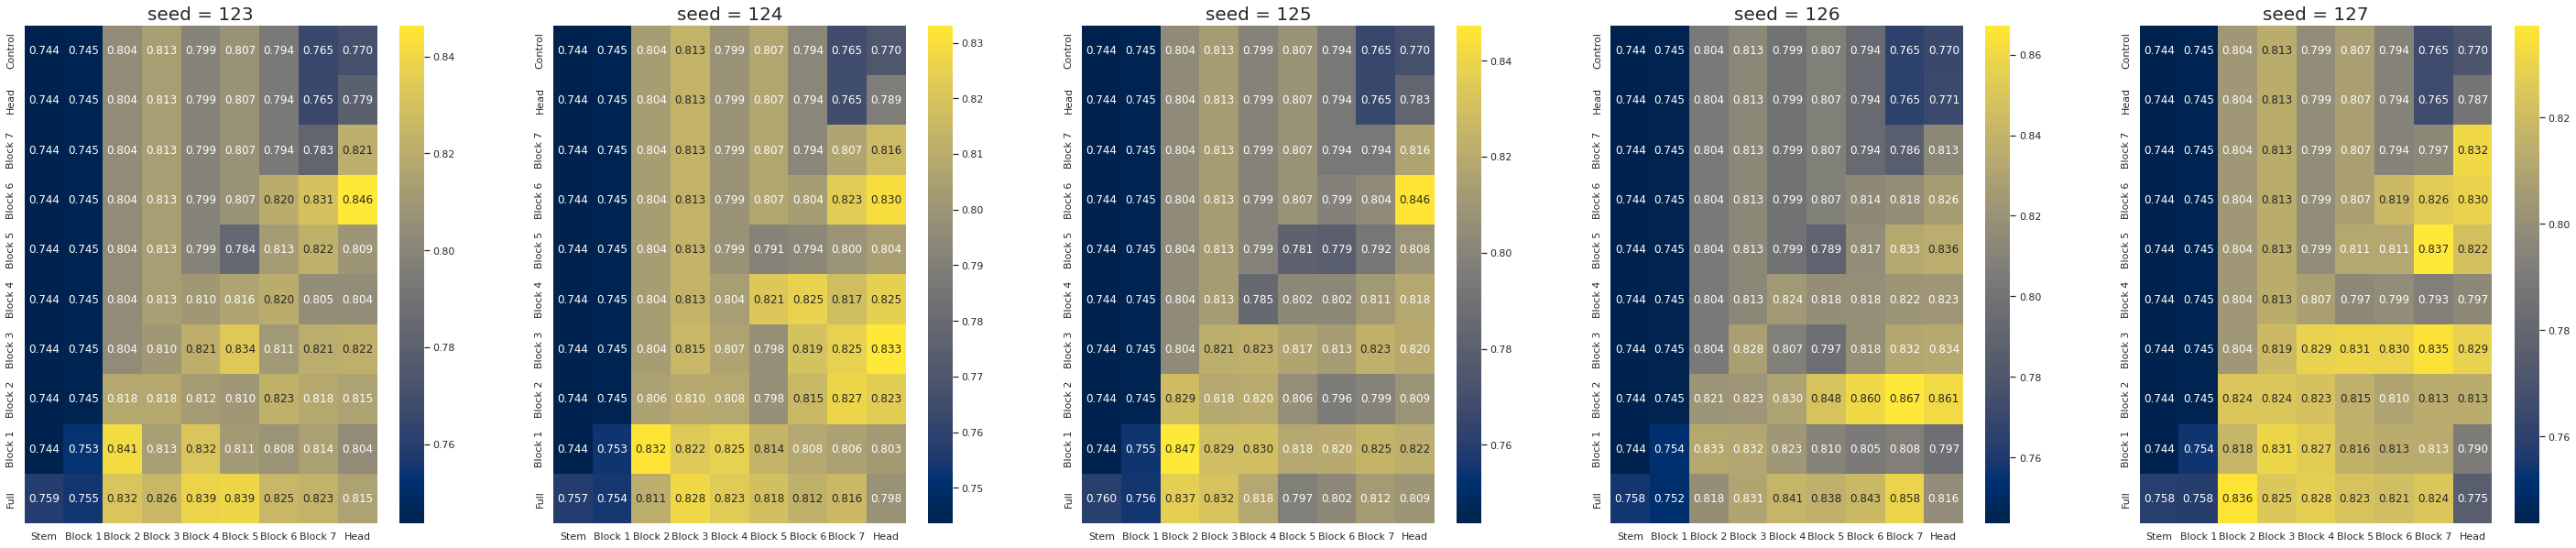

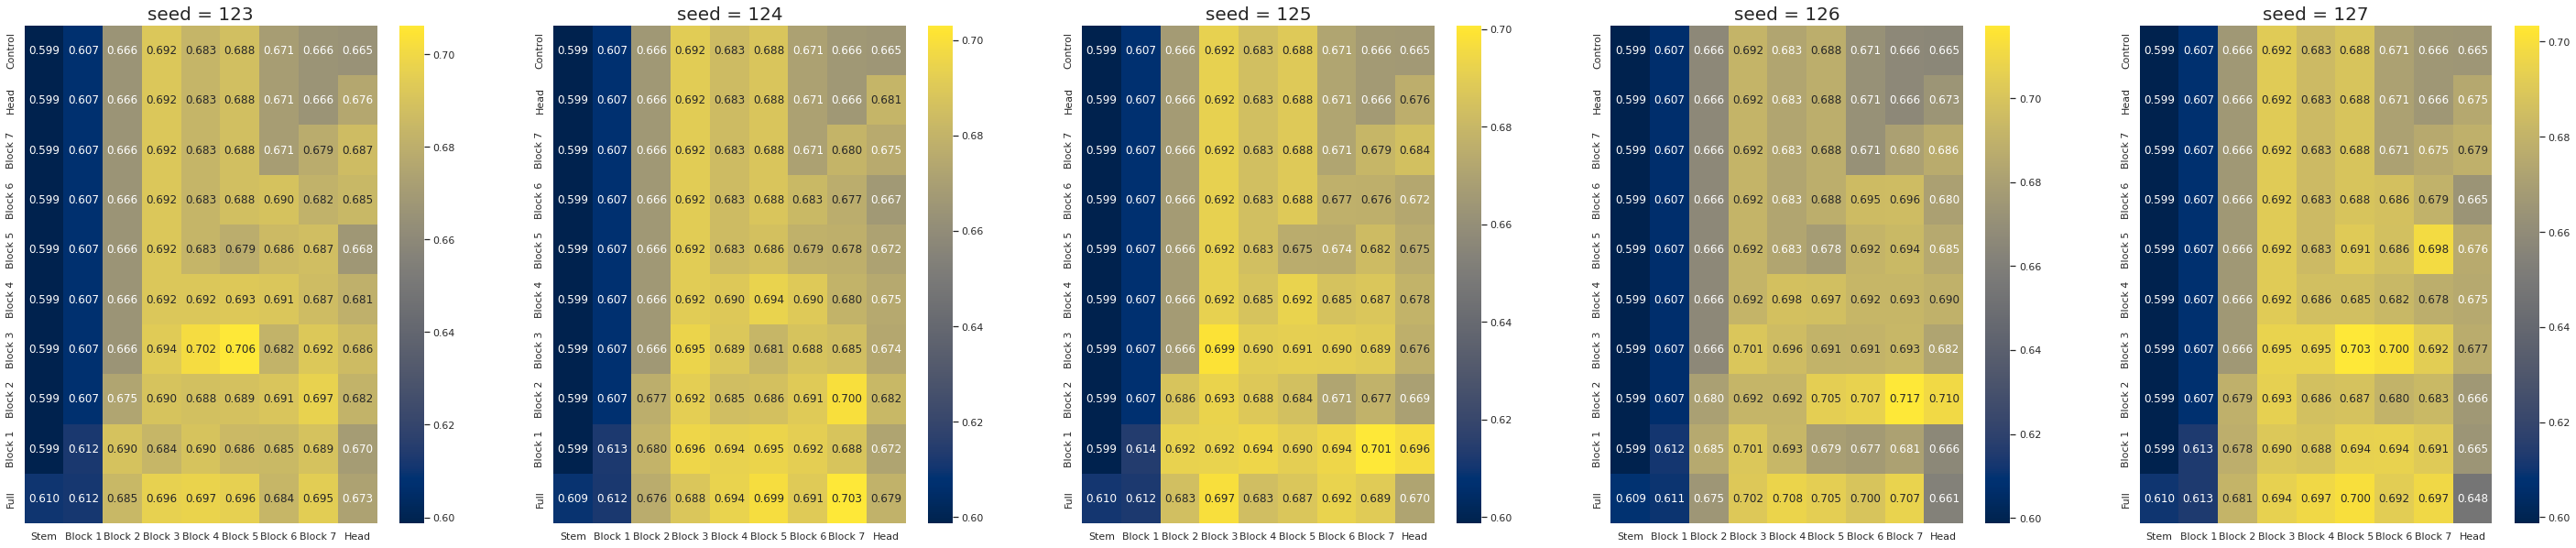

In [15]:
dfs = [pd.read_csv(f"../../outputs/230311prognosis_result_{seed+123}.csv") for seed in range(5)]

import seaborn as sns
import matplotlib.pyplot as plt

model_name = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]
layer_name = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]

import numpy as np


for i, mtx in enumerate(['AUROC', 'AP']):
    fig = plt.figure(figsize=(50, 10))
    for seed in range(5):
        ax = fig.add_subplot(1, 5, seed + 1)
        ax.set_title(f"seed = {seed + 123}", fontdict={"fontsize":20})

        rec = [[0 for i in layer_name] for j in model_name]
        for i, m in enumerate(model_name):
            for j, l in enumerate(layer_name):
                x = dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx]
                rec[i][j] = x
        df = pd.DataFrame(rec)
        df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
        df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

        sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f", ax=ax)
    plt.savefig(f"../../outputs/230607_prognosis_mean_res_{mtx}.png", dpi=300)
    plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


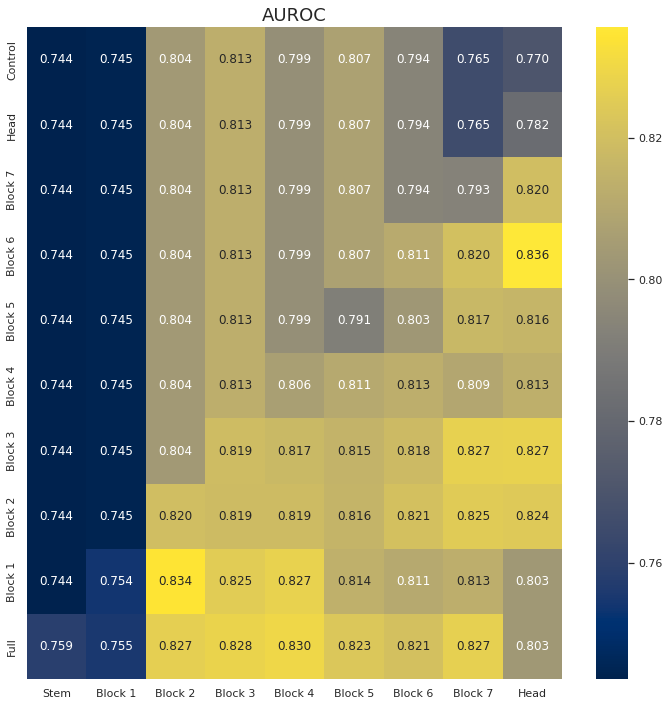

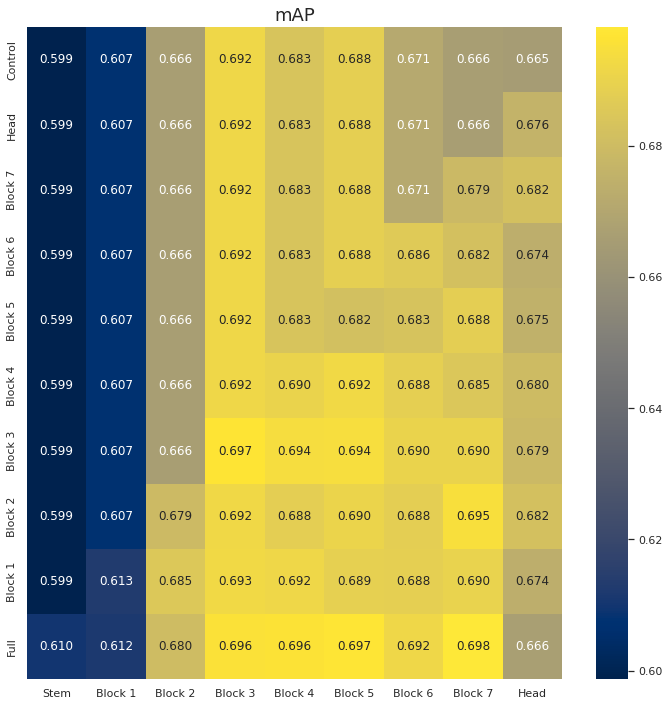

In [32]:
for i, mtx in enumerate(['AUROC', 'AP']):
    plt.figure(figsize=(12, 12))
    plt.title(mtx if mtx=="AUROC" else "mAP", fontsize=18)

    rec = [[0 for i in layer_name] for j in model_name]
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            x = np.mean([dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtx] for seed in range(5)])
            rec[i][j] = x
    df = pd.DataFrame(rec)
    df.columns = ["Stem"] + [f"Block {i+1}" for i in range(7)] + ["Head"]
    df.index = ["Control"] + ["Head"] + [f"Block {7-i}" for i in range(7)] + ["Full"]

    sns.heatmap(df, cmap="cividis", annot=True, fmt=".3f")
    plt.savefig(f"../../outputs/230704_prognosis_mean_res_mean_{mtx}.png", bbox_inches="tight", dpi=300)
    plt.show()



In [5]:
dfs1 = [pd.read_csv(f"../../outputs/results/230308finding_type_validation_loo_seed{seed}_epoch5.csv") for seed in range(123,128)]
dfs2 = [pd.read_csv(f"../../outputs/results/230704compound_validation_macro_{seed}.csv") for seed in range(123,128)]
dfs3 = [pd.read_csv(f"../../outputs/230311prognosis_result_{seed}.csv") for seed in range(123,128)]

dfs1

[                     model    layer     pathological findings     AUROC  \
 0                  Control     Stem  Proliferation, bile duct  0.896421   
 1                  Control  Block 1  Proliferation, bile duct  0.938158   
 2                  Control  Block 2  Proliferation, bile duct  0.968936   
 3                  Control  Block 3  Proliferation, bile duct  0.972933   
 4                  Control  Block 4  Proliferation, bile duct  0.972741   
 ..                     ...      ...                       ...       ...   
 723                   Full  Block 5                  Swelling  0.896128   
 724                   Full  Block 6                  Swelling  0.876552   
 725                   Full  Block 7                  Swelling  0.906462   
 726                   Full     Head                  Swelling  0.904169   
 727  Pathological Findings        -                  Swelling  0.816052   
 
           MCC  Balanced Accuracy        AP  
 0    0.230107           0.579122  0.464

In [9]:
import numpy as np

def extract(dfs, mtrc, model_set=set(model_name), layer_set=set(layer_name)):
    ret = []
    for i, m in enumerate(model_name):
        if m in model_set:
            for j, l in enumerate(layer_name):
                if l in layer_set:
                    if i+j>=8:
                        xs = []
                        for seed in range(5):
                            x = dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtrc]
                            xs.append(x)
                    
                        ret.append(np.mean(xs))
    return ret

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == "":


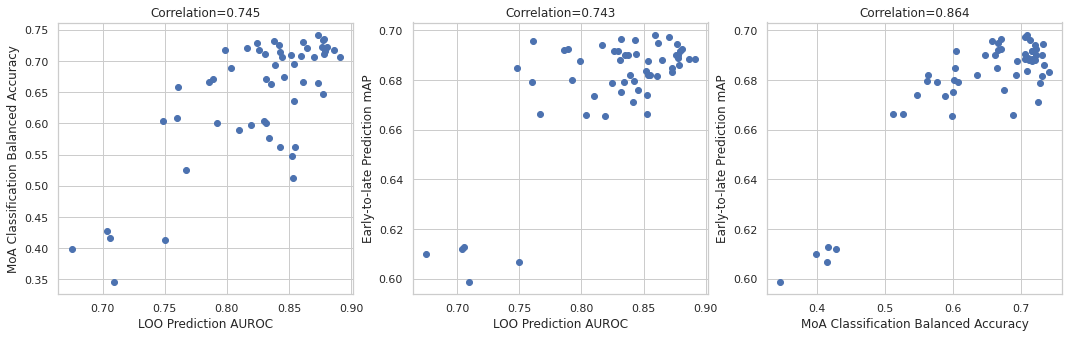

In [10]:
X, Y, Z = extract(dfs1, "AUROC"), extract(dfs2, "Macro Balanced Accuracy"), extract(dfs3, "AP")

plt.figure(figsize=(18,5))
ax = plt.subplot(1,3,1)
ax.set_title(f"Correlation={np.corrcoef(X, Y)[0,1]:.3f}")
ax.set_xlabel("LOO Prediction AUROC")
ax.set_ylabel("MoA Classification Balanced Accuracy")
ax.scatter(X, Y)

ax = plt.subplot(1,3,2)
ax.set_title(f"Correlation={np.corrcoef(X, Z)[0,1]:.3f}")
ax.set_xlabel("LOO Prediction AUROC")
ax.set_ylabel("Early-to-late Prediction mAP")
ax.scatter(X, Z)

ax = plt.subplot(1,3,3)
ax.set_title(f"Correlation={np.corrcoef(Y, Z)[0,1]:.3f}")
ax.set_ylabel("Early-to-late Prediction mAP")
ax.set_xlabel("MoA Classification Balanced Accuracy")
ax.scatter(Y, Z)
plt.savefig(f"../../outputs/230720correlation.tif", bbox_inches="tight", dpi=300)


Stem


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == "":


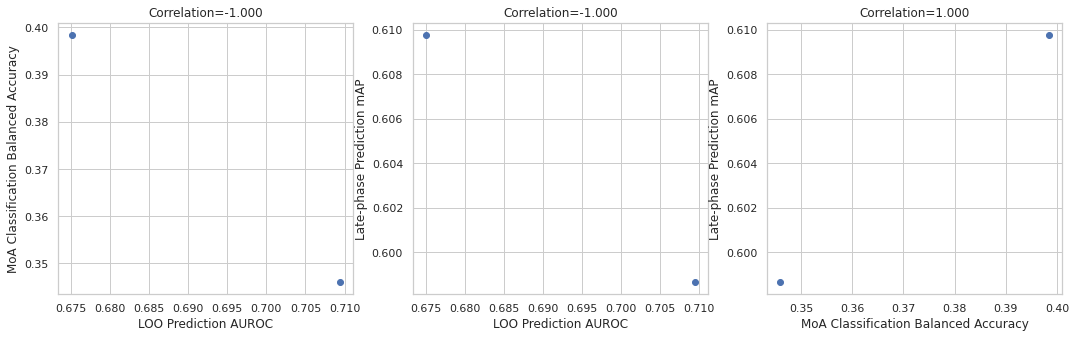

Block 1


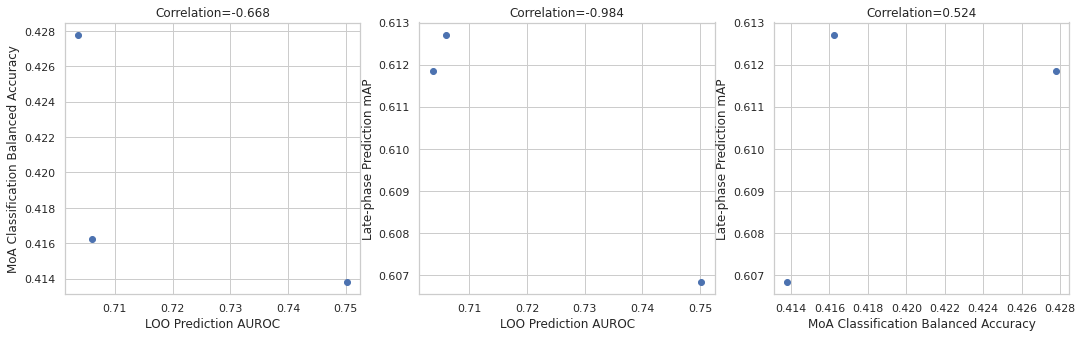

Block 2


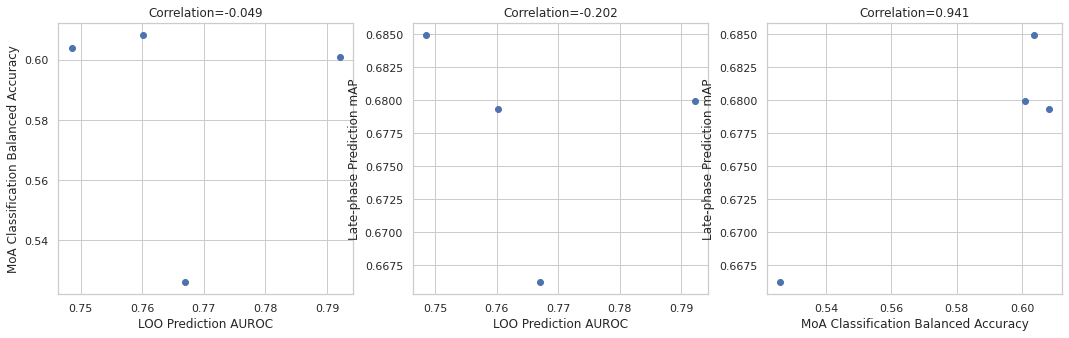

Block 3


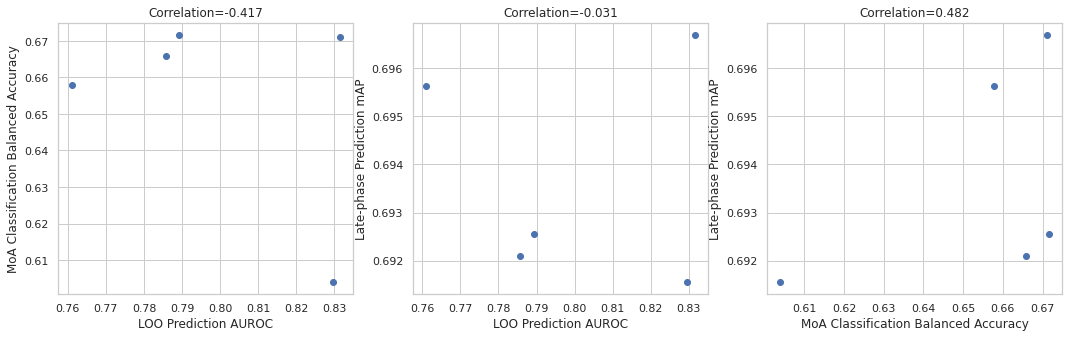

Block 4


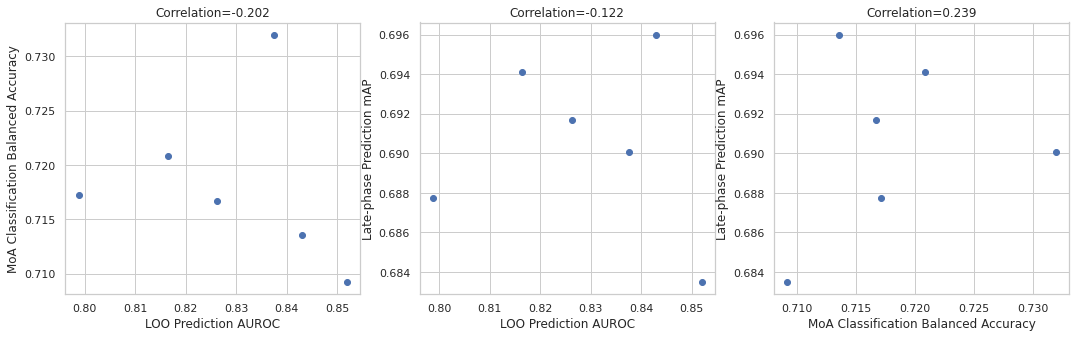

Block 5


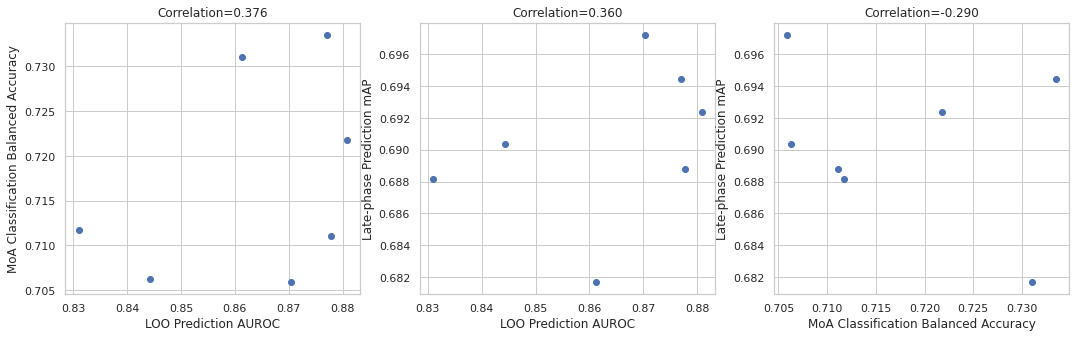

Block 6


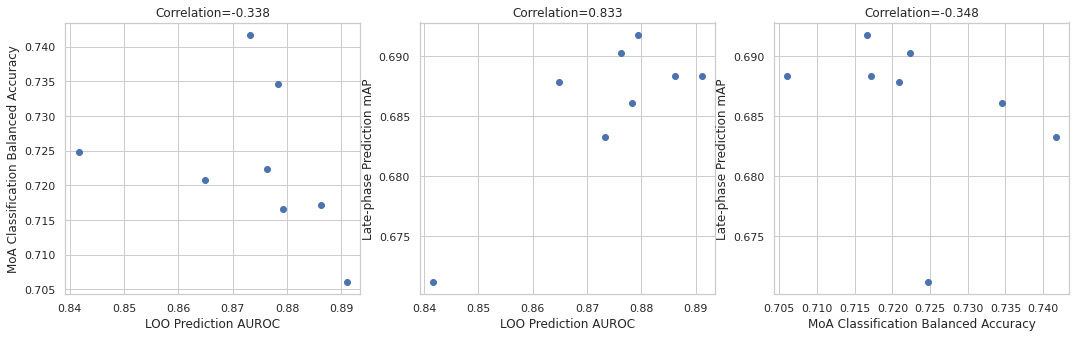

Block 7


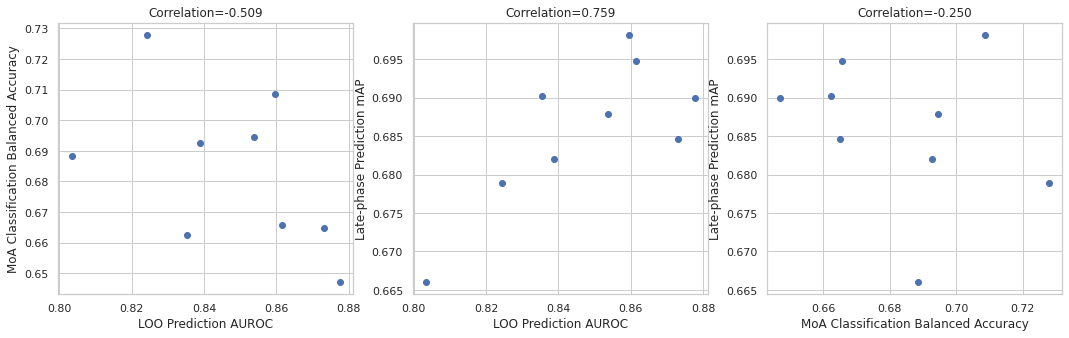

Head


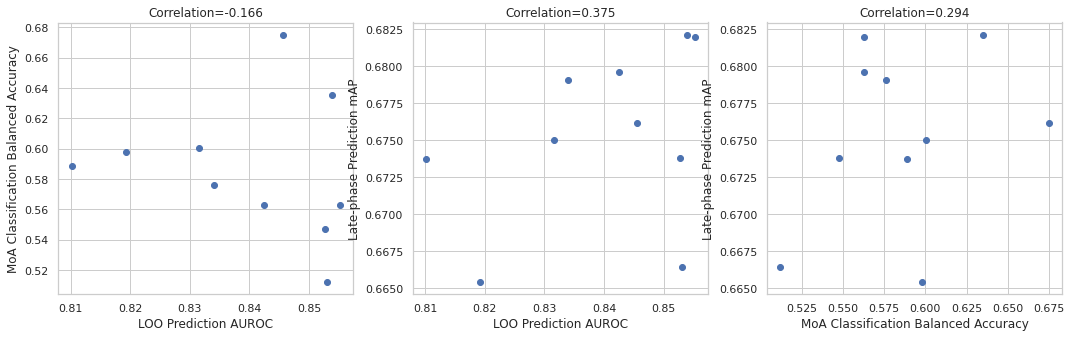

In [79]:
for l in layer_name:
    print(l)
    layer_set = set([l])
    X, Y, Z = extract(dfs1, "AUROC", layer_set=layer_set), extract(dfs2, "Macro Balanced Accuracy", layer_set=layer_set), extract(dfs3, "AP", layer_set=layer_set)

    plt.figure(figsize=(18,5))
    ax = plt.subplot(1,3,1)
    ax.set_title(f"Correlation={np.corrcoef(X, Y)[0,1]:.3f}")
    ax.set_xlabel("LOO Prediction AUROC")
    ax.set_ylabel("MoA Classification Balanced Accuracy")
    ax.scatter(X, Y)

    ax = plt.subplot(1,3,2)
    ax.set_title(f"Correlation={np.corrcoef(X, Z)[0,1]:.3f}")
    ax.set_xlabel("LOO Prediction AUROC")
    ax.set_ylabel("Late-phase Prediction mAP")
    ax.scatter(X, Z)

    ax = plt.subplot(1,3,3)
    ax.set_title(f"Correlation={np.corrcoef(Y, Z)[0,1]:.3f}")
    ax.set_ylabel("Late-phase Prediction mAP")
    ax.set_xlabel("MoA Classification Balanced Accuracy")
    ax.scatter(Y, Z)
    plt.show()


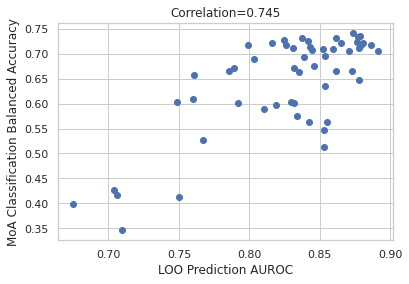

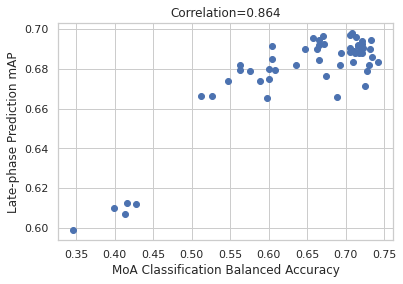

In [69]:
def extract_each_seed(dfs, mtrc, seed):
    ret = []
    for i, m in enumerate(model_name):
        for j, l in enumerate(layer_name):
            if i+j>=8:
                xs = []
                x = dfs[seed][(dfs[seed]["model"]==m) & (dfs[seed]["layer"]==l)].mean(axis=0)[mtrc]
                xs.append(x)                
                ret.append(np.mean(xs))
    return ret



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


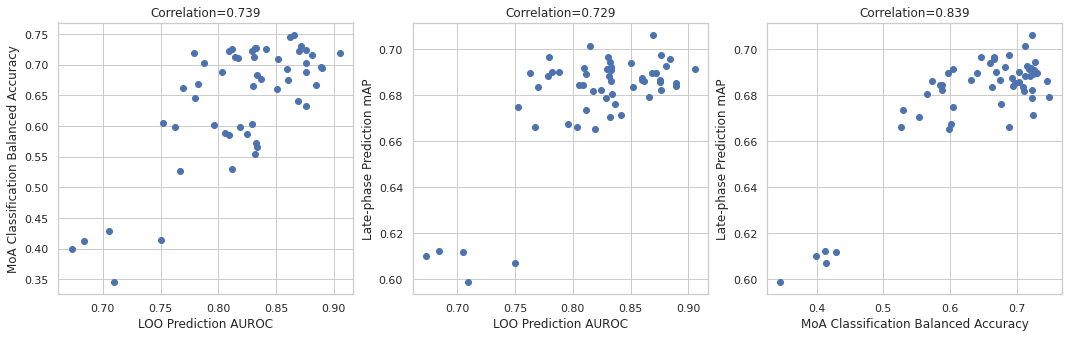

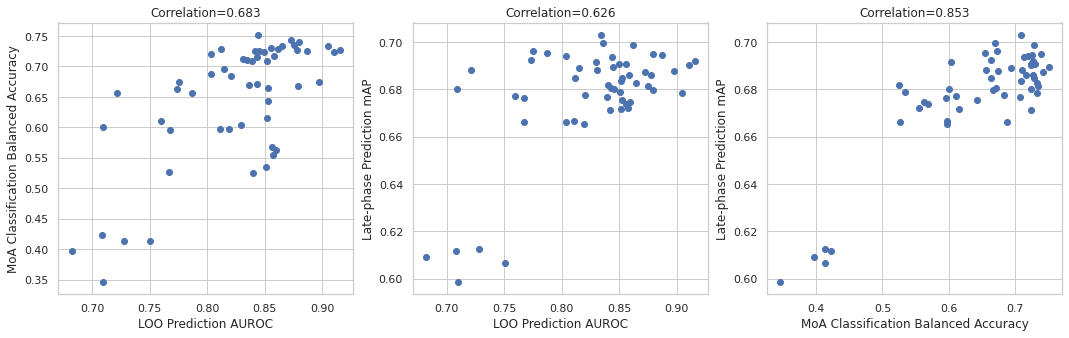

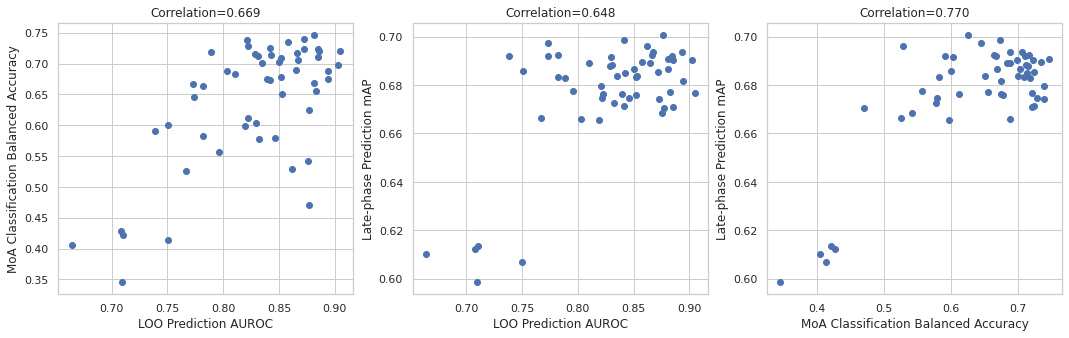

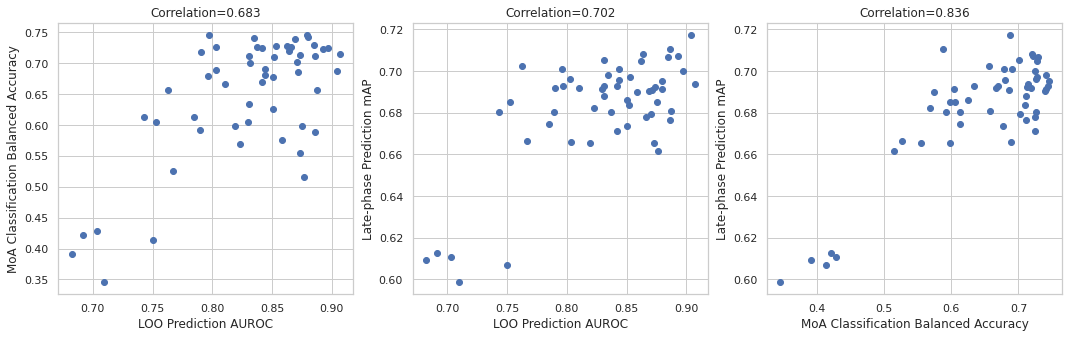

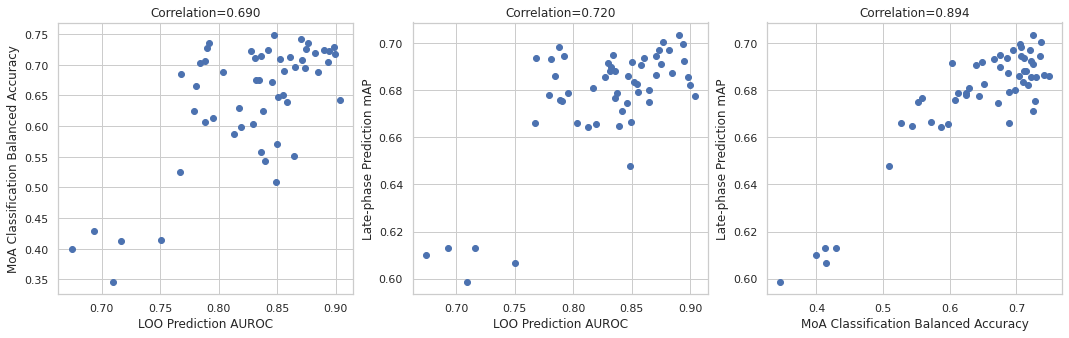

In [74]:
for seed in range(5):
    X, Y, Z = extract_each_seed(dfs1, "AUROC", seed), extract_each_seed(dfs2, "Macro Balanced Accuracy", seed), extract_each_seed(dfs3, "AP", seed)

    plt.figure(figsize=(18,5))
    ax = plt.subplot(1,3,1)
    ax.set_title(f"Correlation={np.corrcoef(X, Y)[0,1]:.3f}")
    ax.set_xlabel("LOO Prediction AUROC")
    ax.set_ylabel("MoA Classification Balanced Accuracy")
    ax.scatter(X, Y)

    ax = plt.subplot(1,3,2)
    ax.set_title(f"Correlation={np.corrcoef(X, Z)[0,1]:.3f}")
    ax.set_xlabel("LOO Prediction AUROC")
    ax.set_ylabel("Late-phase Prediction mAP")
    ax.scatter(X, Z)

    ax = plt.subplot(1,3,3)
    ax.set_title(f"Correlation={np.corrcoef(Y, Z)[0,1]:.3f}")
    ax.set_ylabel("Early-to-late Prediction mAP")
    ax.set_xlabel("MoA Classification Balanced Accuracy")
    ax.scatter(Y, Z)
    plt.savefig(f"../../outputs/230720correlation_{123+seed}.tif", bbox_inches="tight", dpi=300)
    plt.show()

In [75]:
len(X)

54